In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
import zipfile

from tensorflow.keras.utils import load_img # Import load_img from tensorflow.keras.utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.__version__

'2.17.0'

## Carregamento das imagens

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/COMPUTER-VISION/Visão Computacional Guia Completo-20240913T001209Z-001/Visão Computacional Guia Completo/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

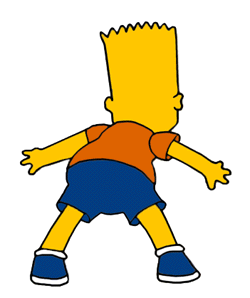

In [4]:

load_img('/content/homer_bart_2/training_set/bart/bart105.bmp') # Now use the imported load_img function

## Base de Treinamento e teste

In [5]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)


In [26]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/homer_bart_2/training_set',
                                                           target_size=(64, 64),
                                                           batch_size=8,
                                                           class_mode='categorical',
                                                           shuffle = False)

Found 215 images belonging to 2 classes.


In [27]:
dataset_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
dataset_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [29]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/homer_bart_2/test_set',
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 54 images belonging to 2 classes.


## Construção e treinamento da rede neural

In [30]:
network = Sequential()

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=577, activation='relu'))
network.add(Dense(units=2, activation='softmax'))


network.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 577)                 │          74,433 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,735 (1.67 MB)

 Trainable params: 437,735 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
historico = network.fit(dataset_treinamento, epochs=50, validation_data=dataset_teste)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.5482 - loss: 0.7602 - val_accuracy: 0.5185 - val_loss: 0.7015
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5802 - loss: 0.7006 - val_accuracy: 0.5185 - val_loss: 0.6946
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4778 - loss: 0.7147 - val_accuracy: 0.5185 - val_loss: 0.7020
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6100 - loss: 0.6896 - val_accuracy: 0.5185 - val_loss: 0.6925
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7213 - loss: 0.6649 - val_accuracy: 0.5185 - val_loss: 0.6930
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5502 - loss: 0.6912 - val_accuracy: 0.5185 - val_loss: 0.6936
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5437 - loss: 0.6893 - val_accuracy: 0.5185 - val_loss: 0.6939
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6265 - loss: 0.6717 - val_accuracy: 0.5185 - val_loss: 0

## Avaliação da Rede Neural

In [33]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [34]:
previsoes = network.predict(dataset_teste)
previsoes

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.00000000e+00, 1.14580926e-17],
       [9.99999285e-01, 7.38550227e-07],
       [7.96501398e-01, 2.03498602e-01],
       [1.00000000e+00, 1.96178307e-17],
       [1.00000000e+00, 1.64368775e-19],
       [1.00000000e+00, 3.35437636e-23],
       [1.00000000e+00, 2.36447510e-18],
       [4.22999322e-01, 5.77000618e-01],
       [9.99039352e-01, 9.60592122e-04],
       [9.23948884e-01, 7.60510787e-02],
       [2.78255492e-01, 7.21744478e-01],
       [1.00000000e+00, 1.52912029e-18],
       [9.31199253e-01, 6.88007548e-02],
       [9.99813318e-01, 1.86623744e-04],
       [1.00000000e+00, 1.13062268e-11],
       [1.00000000e+00, 5.25695861e-13],
       [9.95521903e-01, 4.47810534e-03],
       [1.00000000e+00, 7.01214965e-13],
       [9.85910654e-01, 1.40893646e-02],
       [1.00000000e+00, 1.21985876e-21],
       [9.99727309e-01, 2.72682344e-04],
       [1.00000000e+00, 1.22900259e-16],
       [9.99987960e-01, 1.20464356e-05],
       [1.02996625e-01, 8.97003412e-01],
       [1.000000

In [35]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(dataset_teste.classes, previsoes)

0.9074074074074074

<Axes: >

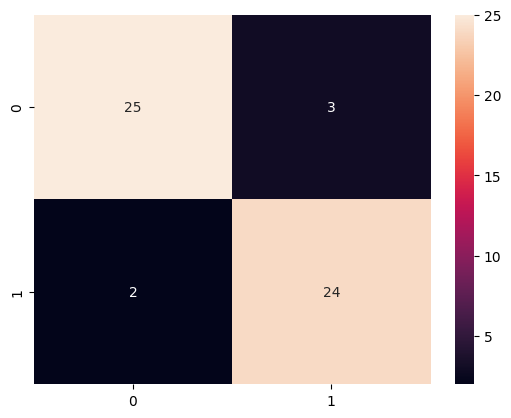

In [38]:
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.89      0.92      0.91        26

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



## Salvar e Carregar a rede neural

In [42]:
model_json = network.to_json()
with open('network2.json', 'w') as json_file:
  json_file.write(model_json)

In [43]:
from keras.models import save_model
network1_saved = save_model(network, 'weights2.hdf5')

In [45]:
with open('network2.json') as json_file:
  json_saved_model = json_file.read()

json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_6", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "name": "input_layer_3"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_9", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.ini

In [47]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights2.hdf5')
network_loaded.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [48]:
network_loaded.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 577)                 │          74,433 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 577)                 │         333,506 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │           1,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 437,735 (1.67 MB)

 Trainable params: 437,735 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

## Classificar uma Única imagem


In [52]:
imagem = cv2.imread('/content/homer_bart_2/test_set/homer/homer17.bmp')

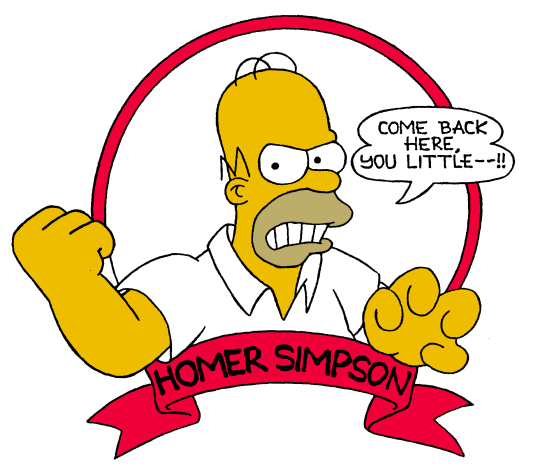

In [53]:
cv2_imshow(imagem)

In [54]:
imagem.shape

(470, 533, 3)

In [55]:
imagem = cv2.resize(imagem, (64,64))
imagem.shape

(64, 64, 3)

In [56]:
imagem = imagem /255

imagem

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [57]:
imagem = imagem.reshape(-1,64,64,3)
imagem.shape

(1, 64, 64, 3)

In [58]:
previsao = network.predict(imagem)
previsao

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


array([[1.0000000e+00, 1.3636105e-28]], dtype=float32)

In [59]:
previsao = np.argmax(previsao, axis = 1)
previsao

array([0])

In [60]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [61]:
if previsao == 1:
  print('Homer')
else:
  print('Bart')

Bart
